


COVID 19 DATA VISUALISATION

Within months, COVID-19 went from an epidemic to a pandemic. We will visualize data from the early months of the coronavirus outbreak to see how this virus grew to be a global pandemic. 

Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections using a few sample countries.
The data used here is from John Hopkins University.

In [1]:
#set up:Importing packages to be used to analyse data
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
JohnHopkins=pd.read_csv("JohnHopkins.csv")

In [3]:
JohnHopkins

,State,Country,Date,Lat,Long,Confirmed,Recovered,Deaths,last_update_ts,last_update_tz,Unnamed: 10,Case/Fatality Ratio
0,NaN,Afghanistan,22/01/2020,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
1,NaN,Afghanistan,23/01/2020,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
2,NaN,Afghanistan,24/01/2020,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
3,NaN,Afghanistan,25/01/2020,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
4,NaN,Afghanistan,26/01/2020,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
...,...,...,...,...,...,...,...,...,...,...,...,...
28297,Zhejiang,China,02/05/2020,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268
28298,Zhejiang,China,03/05/2020,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268
28299,Zhejiang,China,04/05/2020,29.1832,120.0934,1268.0,1267.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268
28300,Zhejiang,China,05/05/2020,29.1832,120.0934,1268.0,1267.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268


Quick Examination of the data

In [4]:
JohnHopkins.head(100)

,State,Country,Date,Lat,Long,Confirmed,Recovered,Deaths,last_update_ts,last_update_tz,Unnamed: 10,Case/Fatality Ratio
0,NaN,Afghanistan,22/01/2020,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
1,NaN,Afghanistan,23/01/2020,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
2,NaN,Afghanistan,24/01/2020,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
3,NaN,Afghanistan,25/01/2020,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
4,NaN,Afghanistan,26/01/2020,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Afghanistan,26/04/2020,33.0,65.0,1531.0,207.0,50.0,2020-05-07T14:00:03Z,UTC,NaN,30.62
96,NaN,Afghanistan,27/04/2020,33.0,65.0,1703.0,220.0,57.0,2020-05-07T14:00:03Z,UTC,NaN,29.87719298
97,NaN,Afghanistan,28/04/2020,33.0,65.0,1828.0,228.0,58.0,2020-05-07T14:00:03Z,UTC,NaN,31.51724138
98,NaN,Afghanistan,29/04/2020,33.0,65.0,1939.0,252.0,60.0,2020-05-07T14:00:03Z,UTC,NaN,32.31666667


In [5]:
JohnHopkins.dtypes

State                   object
Country                 object
Date                    object
Lat                    float64
Long                   float64
Confirmed              float64
Recovered              float64
Deaths                 float64
last_update_ts          object
last_update_tz          object
Unnamed: 10            float64
Case/Fatality Ratio     object
dtype: object

In [6]:
JohnHopkins.tail(100)

,State,Country,Date,Lat,Long,Confirmed,Recovered,Deaths,last_update_ts,last_update_tz,Unnamed: 10,Case/Fatality Ratio
28202,Zhejiang,China,28/01/2020,29.1832,120.0934,173.0,3.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
28203,Zhejiang,China,29/01/2020,29.1832,120.0934,296.0,3.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
28204,Zhejiang,China,30/01/2020,29.1832,120.0934,428.0,4.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
28205,Zhejiang,China,31/01/2020,29.1832,120.0934,538.0,14.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
28206,Zhejiang,China,01/02/2020,29.1832,120.0934,599.0,21.0,0.0,2020-05-07T14:00:03Z,UTC,NaN,#DIV/0!
...,...,...,...,...,...,...,...,...,...,...,...,...
28297,Zhejiang,China,02/05/2020,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268
28298,Zhejiang,China,03/05/2020,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268
28299,Zhejiang,China,04/05/2020,29.1832,120.0934,1268.0,1267.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268
28300,Zhejiang,China,05/05/2020,29.1832,120.0934,1268.0,1267.0,1.0,2020-05-07T14:00:03Z,UTC,NaN,1268


In [7]:
JohnHopkins.info()
JohnHopkins.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                8692 non-null   object 
 1   Country              28302 non-null  object 
 2   Date                 28302 non-null  object 
 3   Lat                  28196 non-null  float64
 4   Long                 28196 non-null  float64
 5   Confirmed            28196 non-null  float64
 6   Recovered            26712 non-null  float64
 7   Deaths               28196 non-null  float64
 8   last_update_ts       28302 non-null  object 
 9   last_update_tz       28302 non-null  object 
 10  Unnamed: 10          0 non-null      float64
 11  Case/Fatality Ratio  28302 non-null  object 
dtypes: float64(6), object(6)
memory usage: 2.6+ MB


,Lat,Long,Confirmed,Recovered,Deaths,Unnamed: 10
count,28196.000000,28196.000000,2.819600e+04,26712.000000,28196.000000,0.0
mean,21.259359,22.432499,3.366715e+03,984.113282,221.227302,NaN
std,24.701818,70.347551,3.187493e+04,7449.762208,2209.295382,NaN
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,NaN
25%,6.877000,-19.020800,0.000000e+00,0.000000,0.000000,NaN
50%,23.488100,20.921188,1.100000e+01,0.000000,0.000000,NaN
75%,41.153300,78.000000,2.712500e+02,67.000000,3.000000,NaN
max,71.706900,178.065000,1.228603e+06,189910.000000,73431.000000,NaN


CREATING NEW DATA FRAMES FOR PLOTTING GRAPHS
Here the data was cleaned  up to remove the Longitude,Latitude and State data which was not required or necessary to plot the graphs for each country.
The new data frame had country,date,confrimed cases,rocveries and deaths.

In [8]:
country_data=JohnHopkins[["Country","Date","Confirmed","Recovered","Deaths"]]

In [9]:
country_data

,Country,Date,Confirmed,Recovered,Deaths
0,Afghanistan,22/01/2020,0.0,0.0,0.0
1,Afghanistan,23/01/2020,0.0,0.0,0.0
2,Afghanistan,24/01/2020,0.0,0.0,0.0
3,Afghanistan,25/01/2020,0.0,0.0,0.0
4,Afghanistan,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
28297,China,02/05/2020,1268.0,1265.0,1.0
28298,China,03/05/2020,1268.0,1265.0,1.0
28299,China,04/05/2020,1268.0,1267.0,1.0
28300,China,05/05/2020,1268.0,1267.0,1.0


INDIVIDUAL COUNTRY DATA

In [10]:
#Obtaining Kenya Country Data from the newly created data frame.
select_Kenya=country_data[country_data['Country'] == 'Kenya']
select_Kenya

,Country,Date,Confirmed,Recovered,Deaths
9328,Kenya,22/01/2020,0.0,0.0,0.0
9329,Kenya,23/01/2020,0.0,0.0,0.0
9330,Kenya,24/01/2020,0.0,0.0,0.0
9331,Kenya,25/01/2020,0.0,0.0,0.0
9332,Kenya,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
9429,Kenya,02/05/2020,435.0,152.0,22.0
9430,Kenya,03/05/2020,465.0,167.0,24.0
9431,Kenya,04/05/2020,490.0,173.0,24.0
9432,Kenya,05/05/2020,535.0,182.0,24.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Kenya'}>

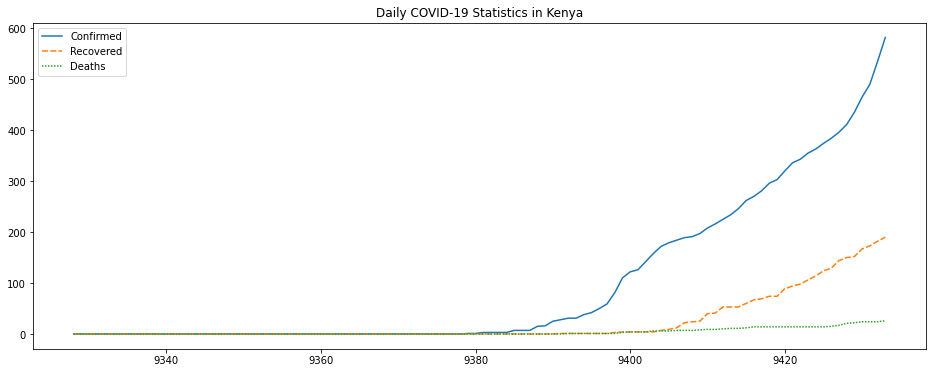

In [11]:
#defining size of the figure
plt.figure(figsize=(16,6))
#adding a title to the plot
plt.title ("Daily COVID-19 Statistics in Kenya")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Kenya)

In [12]:
#Obtaining Ghana Country Data from the newly created data frame
select_Ghana=country_data[country_data['Country'] == 'Ghana']
select_Ghana                      

,Country,Date,Confirmed,Recovered,Deaths
6890,Ghana,22/01/2020,0.0,0.0,0.0
6891,Ghana,23/01/2020,0.0,0.0,0.0
6892,Ghana,24/01/2020,0.0,0.0,0.0
6893,Ghana,25/01/2020,0.0,0.0,0.0
6894,Ghana,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
6991,Ghana,02/05/2020,2169.0,229.0,18.0
6992,Ghana,03/05/2020,2169.0,229.0,18.0
6993,Ghana,04/05/2020,2719.0,294.0,18.0
6994,Ghana,05/05/2020,2719.0,294.0,18.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Ghana'}>

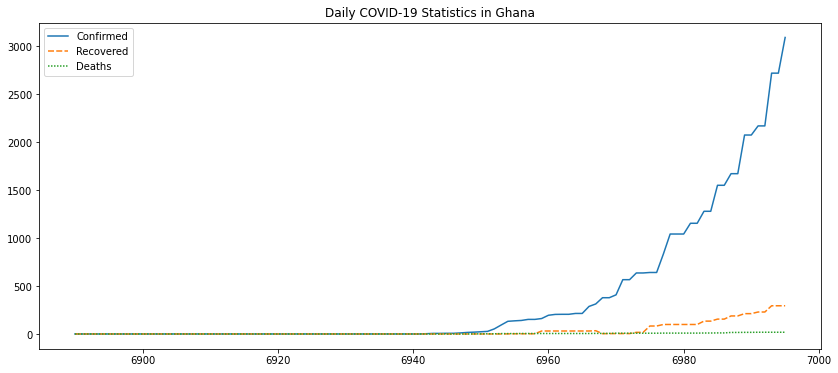

In [13]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding a title to the plot
plt.title ("Daily COVID-19 Statistics in Ghana")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Ghana)

In [14]:
#Obtaining Egypt Country Data from the newly created data frame.
select_Egypt=country_data[country_data['Country'] == 'Egypt']
select_Egypt

,Country,Date,Confirmed,Recovered,Deaths
5406,Egypt,22/01/2020,0.0,0.0,0.0
5407,Egypt,23/01/2020,0.0,0.0,0.0
5408,Egypt,24/01/2020,0.0,0.0,0.0
5409,Egypt,25/01/2020,0.0,0.0,0.0
5410,Egypt,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
5507,Egypt,02/05/2020,6193.0,1522.0,415.0
5508,Egypt,03/05/2020,6465.0,1562.0,429.0
5509,Egypt,04/05/2020,6813.0,1632.0,436.0
5510,Egypt,05/05/2020,7201.0,1730.0,452.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Egypt'}>

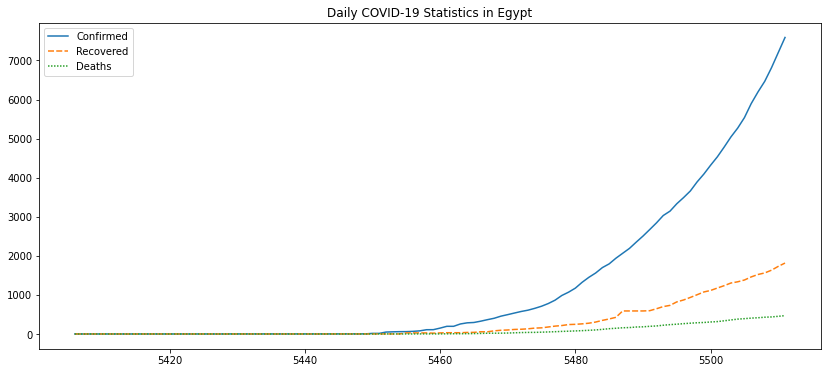

In [15]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Egypt")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Egypt)

In [16]:
#Obtaining Togo Country Data from the newly created data frame.
select_Togo=country_data[country_data['Country'] == 'Togo']
select_Togo

,Country,Date,Confirmed,Recovered,Deaths
17702,Togo,22/01/2020,0.0,0.0,0.0
17703,Togo,23/01/2020,0.0,0.0,0.0
17704,Togo,24/01/2020,0.0,0.0,0.0
17705,Togo,25/01/2020,0.0,0.0,0.0
17706,Togo,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
17803,Togo,02/05/2020,123.0,66.0,9.0
17804,Togo,03/05/2020,124.0,67.0,9.0
17805,Togo,04/05/2020,126.0,74.0,9.0
17806,Togo,05/05/2020,128.0,74.0,9.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Togo'}>

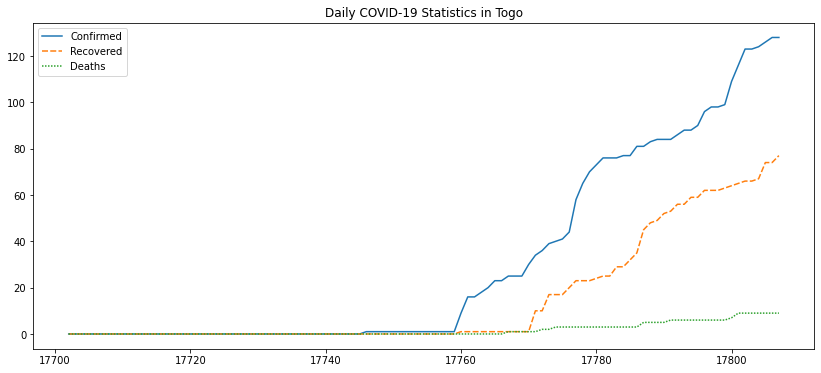

In [17]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Togo")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Togo)

In [18]:
#Obtaining Uganda Country Data from the newly created data frame.
select_Uganda=country_data[country_data['Country'] == 'Uganda']
select_Uganda

,Country,Date,Confirmed,Recovered,Deaths
18232,Uganda,22/01/2020,0.0,0.0,0.0
18233,Uganda,23/01/2020,0.0,0.0,0.0
18234,Uganda,24/01/2020,0.0,0.0,0.0
18235,Uganda,25/01/2020,0.0,0.0,0.0
18236,Uganda,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
18333,Uganda,02/05/2020,88.0,52.0,0.0
18334,Uganda,03/05/2020,89.0,52.0,0.0
18335,Uganda,04/05/2020,97.0,55.0,0.0
18336,Uganda,05/05/2020,98.0,55.0,0.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Uganda'}>

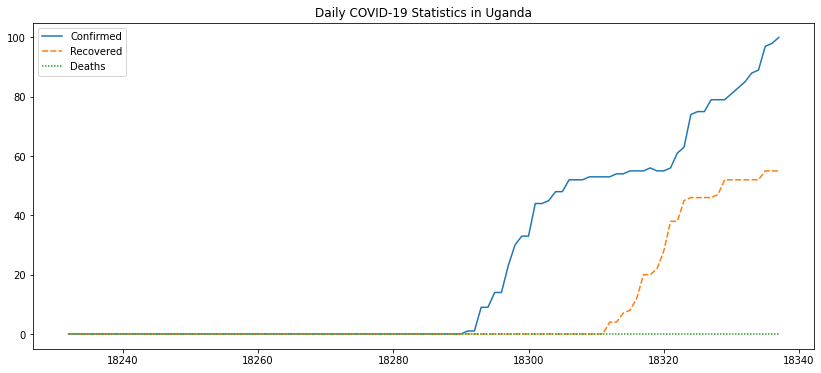

In [19]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Uganda")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Uganda)

In [20]:
#Obtaining Rwanda Country Data from the newly created data frame.
select_Rwanda=country_data[country_data['Country'] == 'Rwanda']
select_Rwanda

,Country,Date,Confirmed,Recovered,Deaths
14628,Rwanda,22/01/2020,0.0,0.0,0.0
14629,Rwanda,23/01/2020,0.0,0.0,0.0
14630,Rwanda,24/01/2020,0.0,0.0,0.0
14631,Rwanda,25/01/2020,0.0,0.0,0.0
14632,Rwanda,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
14729,Rwanda,02/05/2020,255.0,120.0,0.0
14730,Rwanda,03/05/2020,259.0,124.0,0.0
14731,Rwanda,04/05/2020,261.0,128.0,0.0
14732,Rwanda,05/05/2020,261.0,129.0,0.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Rwanda'}>

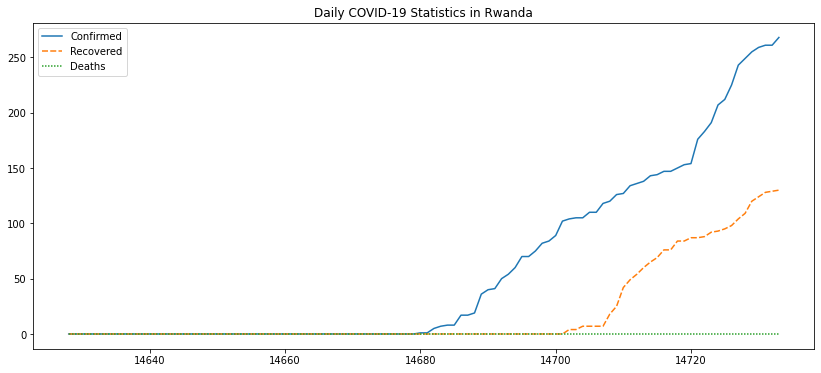

In [21]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Rwanda")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Rwanda)

In [22]:
#Obtaining Madagascar Country Data from the newly created data frame.
select_Madagascar=country_data[country_data['Country'] == 'Madagascar']
select_Madagascar

,Country,Date,Confirmed,Recovered,Deaths
10812,Madagascar,22/01/2020,0.0,0.0,0.0
10813,Madagascar,23/01/2020,0.0,0.0,0.0
10814,Madagascar,24/01/2020,0.0,0.0,0.0
10815,Madagascar,25/01/2020,0.0,0.0,0.0
10816,Madagascar,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
10913,Madagascar,02/05/2020,135.0,97.0,0.0
10914,Madagascar,03/05/2020,149.0,98.0,0.0
10915,Madagascar,04/05/2020,149.0,99.0,0.0
10916,Madagascar,05/05/2020,151.0,101.0,0.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Madagascar'}>

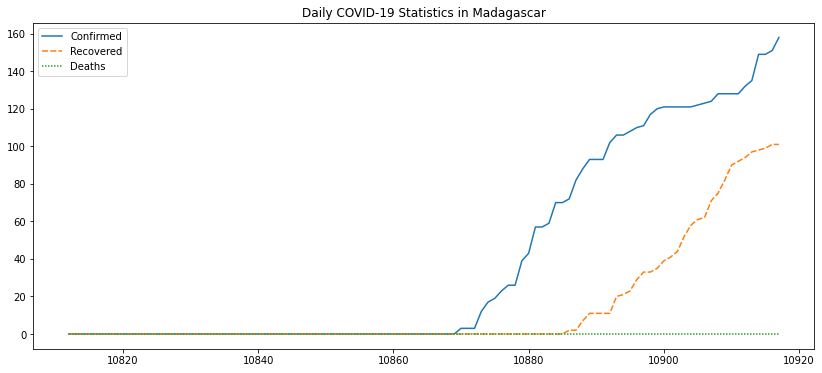

In [23]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Madagascar")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Madagascar)

In [24]:
#Obtaining Nigeria Country Data from the newly created data frame.
select_Nigeria=country_data[country_data['Country'] == 'Nigeria']
select_Nigeria

,Country,Date,Confirmed,Recovered,Deaths
13038,Nigeria,22/01/2020,0.0,0.0,0.0
13039,Nigeria,23/01/2020,0.0,0.0,0.0
13040,Nigeria,24/01/2020,0.0,0.0,0.0
13041,Nigeria,25/01/2020,0.0,0.0,0.0
13042,Nigeria,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
13139,Nigeria,02/05/2020,2388.0,351.0,85.0
13140,Nigeria,03/05/2020,2558.0,400.0,87.0
13141,Nigeria,04/05/2020,2802.0,417.0,93.0
13142,Nigeria,05/05/2020,2950.0,481.0,98.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Nigeria'}>

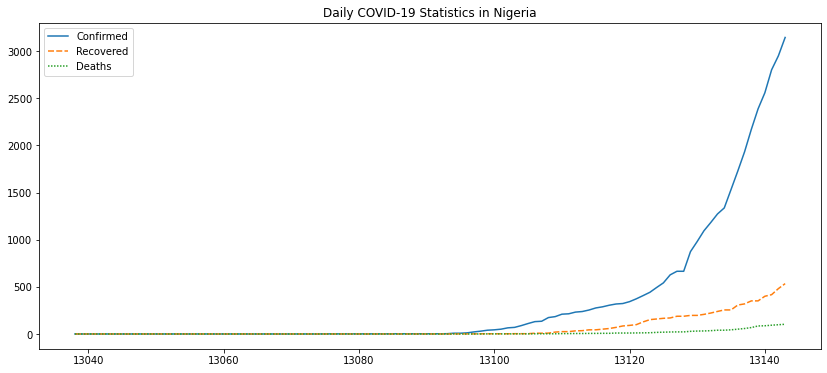

In [25]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Nigeria")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Nigeria)

In [26]:
#Obtaining South Africa Country Data from the newly created data frame.
select_SouthAfrica=country_data[country_data['Country'] == 'South Africa']
select_SouthAfrica

,Country,Date,Confirmed,Recovered,Deaths
16218,South Africa,22/01/2020,0.0,0.0,0.0
16219,South Africa,23/01/2020,0.0,0.0,0.0
16220,South Africa,24/01/2020,0.0,0.0,0.0
16221,South Africa,25/01/2020,0.0,0.0,0.0
16222,South Africa,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
16319,South Africa,02/05/2020,6336.0,2549.0,123.0
16320,South Africa,03/05/2020,6783.0,2549.0,131.0
16321,South Africa,04/05/2020,7220.0,2746.0,138.0
16322,South Africa,05/05/2020,7572.0,2746.0,148.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in South Africa'}>

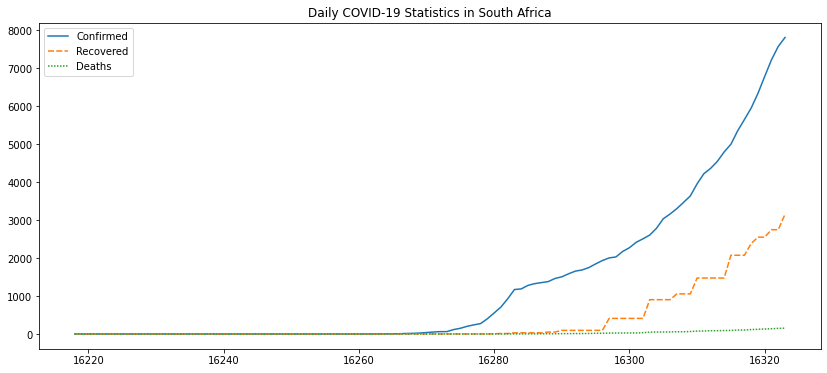

In [27]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in South Africa")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_SouthAfrica)

In [28]:
#Obtaining Tanzania Country Data from the newly created data frame.
select_Tanzania=country_data[country_data['Country'] == 'Tanzania']
select_Tanzania

,Country,Date,Confirmed,Recovered,Deaths
17384,Tanzania,22/01/2020,0.0,0.0,0.0
17385,Tanzania,23/01/2020,0.0,0.0,0.0
17386,Tanzania,24/01/2020,0.0,0.0,0.0
17387,Tanzania,25/01/2020,0.0,0.0,0.0
17388,Tanzania,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
17485,Tanzania,02/05/2020,480.0,167.0,16.0
17486,Tanzania,03/05/2020,480.0,167.0,16.0
17487,Tanzania,04/05/2020,480.0,167.0,16.0
17488,Tanzania,05/05/2020,480.0,167.0,16.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Tanzania'}>

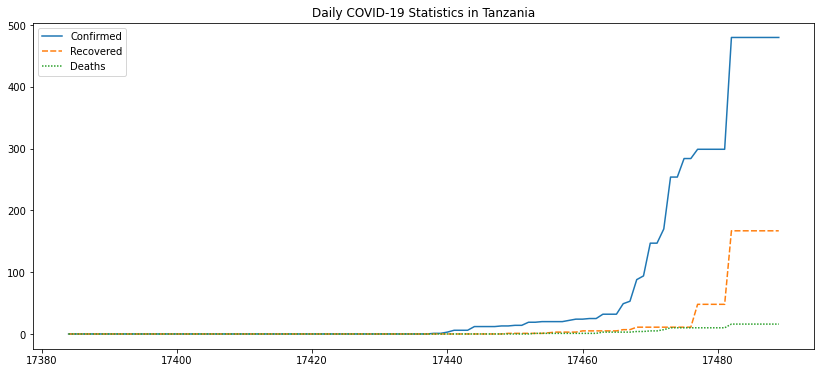

In [29]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Tanzania")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Tanzania)

In [30]:
#Obtaining Burundi Country Data from the newly created data frame.
select_Burundi=country_data[country_data['Country'] == 'Burundi']
select_Burundi

,Country,Date,Confirmed,Recovered,Deaths
2862,Burundi,22/01/2020,0.0,0.0,0.0
2863,Burundi,23/01/2020,0.0,0.0,0.0
2864,Burundi,24/01/2020,0.0,0.0,0.0
2865,Burundi,25/01/2020,0.0,0.0,0.0
2866,Burundi,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
2963,Burundi,02/05/2020,15.0,7.0,1.0
2964,Burundi,03/05/2020,15.0,7.0,1.0
2965,Burundi,04/05/2020,15.0,7.0,1.0
2966,Burundi,05/05/2020,15.0,7.0,1.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Burundi'}>

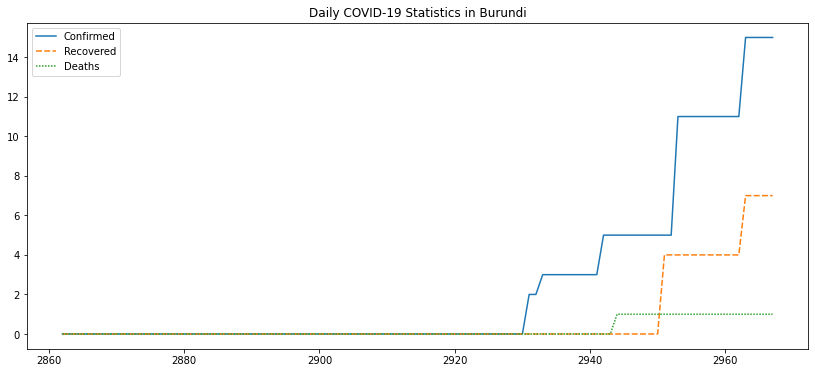

In [31]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Burundi")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Burundi)

In [32]:
#Obtaining Namibia Country Data from the newly created data frame.
select_Namibia=country_data[country_data['Country'] == 'Namibia']
select_Namibia

,Country,Date,Confirmed,Recovered,Deaths
12402,Namibia,22/01/2020,0.0,0.0,0.0
12403,Namibia,23/01/2020,0.0,0.0,0.0
12404,Namibia,24/01/2020,0.0,0.0,0.0
12405,Namibia,25/01/2020,0.0,0.0,0.0
12406,Namibia,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
12503,Namibia,02/05/2020,16.0,8.0,0.0
12504,Namibia,03/05/2020,16.0,8.0,0.0
12505,Namibia,04/05/2020,16.0,8.0,0.0
12506,Namibia,05/05/2020,16.0,8.0,0.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Namibia'}>

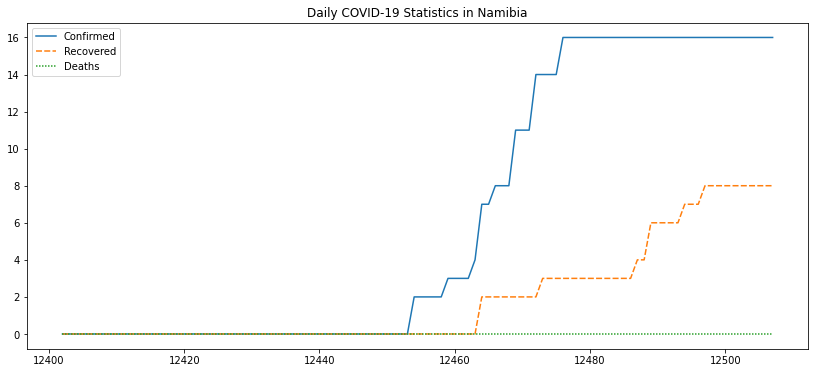

In [33]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Namibia")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Namibia)

In [34]:
#Obtaining China Country Data from the newly created data frame.
select_China=country_data[country_data['Country'] == 'China']
select_China

,Country,Date,Confirmed,Recovered,Deaths
19822,China,22/01/2020,1.0,0.0,0.0
19823,China,23/01/2020,9.0,0.0,0.0
19824,China,24/01/2020,15.0,0.0,0.0
19825,China,25/01/2020,39.0,0.0,0.0
19826,China,26/01/2020,60.0,0.0,0.0
...,...,...,...,...,...
28297,China,02/05/2020,1268.0,1265.0,1.0
28298,China,03/05/2020,1268.0,1265.0,1.0
28299,China,04/05/2020,1268.0,1267.0,1.0
28300,China,05/05/2020,1268.0,1267.0,1.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in China'}>

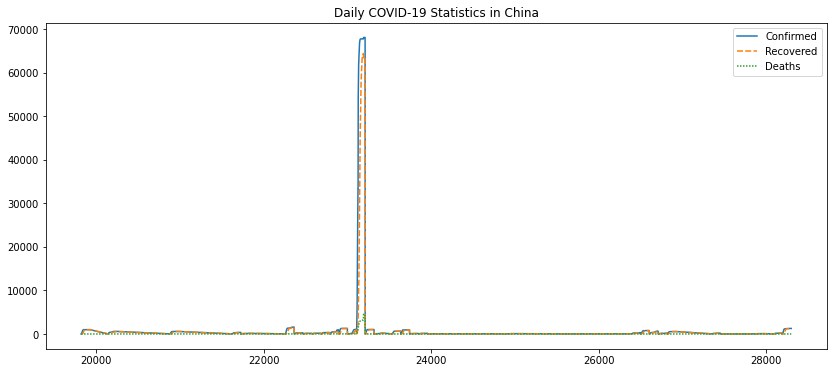

In [35]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in China")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_China)

In [36]:
#Obtaining India Country Data from the newly created data frame.
select_India=country_data[country_data['Country'] == 'India']
select_India

,Country,Date,Confirmed,Recovered,Deaths
8162,India,22/01/2020,0.0,0.0,0.0
8163,India,23/01/2020,0.0,0.0,0.0
8164,India,24/01/2020,0.0,0.0,0.0
8165,India,25/01/2020,0.0,0.0,0.0
8166,India,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
8263,India,02/05/2020,39699.0,10819.0,1323.0
8264,India,03/05/2020,42505.0,11775.0,1391.0
8265,India,04/05/2020,46437.0,12847.0,1566.0
8266,India,05/05/2020,49400.0,14142.0,1693.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in India'}>

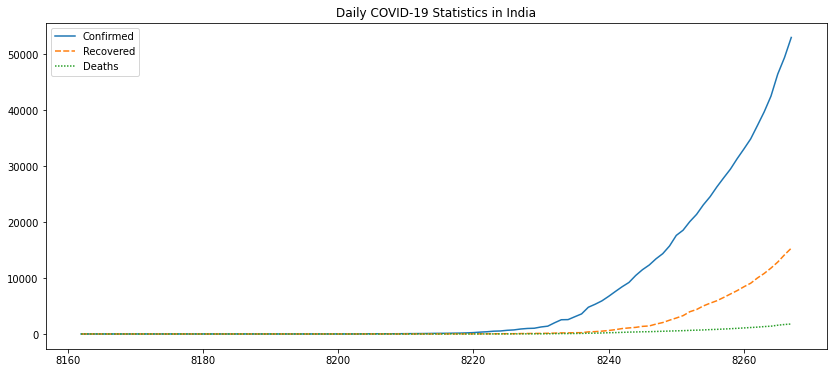

In [37]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in India")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_India)

In [38]:
#Obtaining Japan Country Data from the newly created data frame.
select_Japan=country_data[country_data['Country'] == 'Japan']
select_Japan

,Country,Date,Confirmed,Recovered,Deaths
9010,Japan,22/01/2020,2.0,0.0,0.0
9011,Japan,23/01/2020,2.0,0.0,0.0
9012,Japan,24/01/2020,2.0,0.0,0.0
9013,Japan,25/01/2020,2.0,0.0,0.0
9014,Japan,26/01/2020,4.0,1.0,0.0
...,...,...,...,...,...
9111,Japan,02/05/2020,14571.0,3205.0,474.0
9112,Japan,03/05/2020,14877.0,3981.0,487.0
9113,Japan,04/05/2020,15078.0,4156.0,536.0
9114,Japan,05/05/2020,15253.0,4496.0,556.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Japan'}>

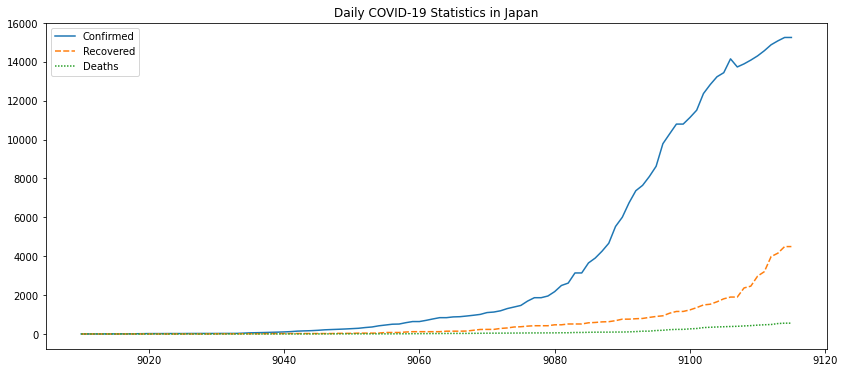

In [39]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Japan")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Japan)

In [40]:
#Obtaining Turkey Country Data from the newly created data frame.
select_Turkey=country_data[country_data['Country'] == 'Turkey']
select_Turkey

,Country,Date,Confirmed,Recovered,Deaths
18020,Turkey,22/01/2020,0.0,0.0,0.0
18021,Turkey,23/01/2020,0.0,0.0,0.0
18022,Turkey,24/01/2020,0.0,0.0,0.0
18023,Turkey,25/01/2020,0.0,0.0,0.0
18024,Turkey,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
18121,Turkey,02/05/2020,124375.0,58259.0,3336.0
18122,Turkey,03/05/2020,126045.0,63151.0,3397.0
18123,Turkey,04/05/2020,127659.0,68166.0,3461.0
18124,Turkey,05/05/2020,129491.0,73285.0,3520.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Turkey'}>

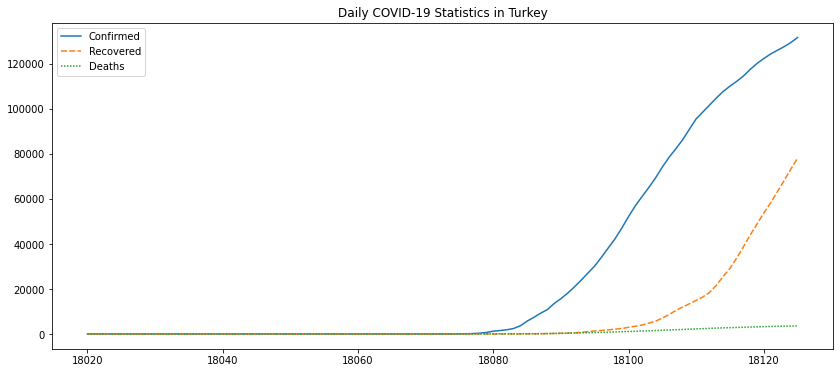

In [41]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Turkey")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Turkey)

In [42]:
#Obtaining Saudi Arabia Country Data from the newly created data frame.
select_SaudiArabia=country_data[country_data['Country'] == 'Saudi Arabia']
select_SaudiArabia

,Country,Date,Confirmed,Recovered,Deaths
15264,Saudi Arabia,22/01/2020,0.0,0.0,0.0
15265,Saudi Arabia,23/01/2020,0.0,0.0,0.0
15266,Saudi Arabia,24/01/2020,0.0,0.0,0.0
15267,Saudi Arabia,25/01/2020,0.0,0.0,0.0
15268,Saudi Arabia,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
15365,Saudi Arabia,02/05/2020,25459.0,3765.0,176.0
15366,Saudi Arabia,03/05/2020,27011.0,4134.0,184.0
15367,Saudi Arabia,04/05/2020,28656.0,4476.0,191.0
15368,Saudi Arabia,05/05/2020,30251.0,5431.0,200.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Saudi Arabia'}>

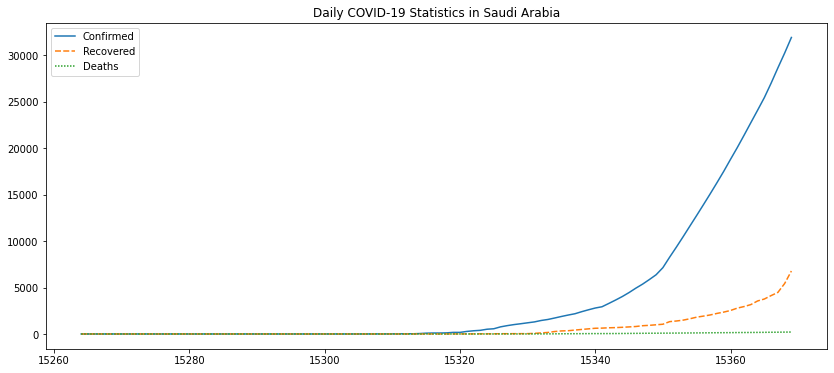

In [43]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Saudi Arabia")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_SaudiArabia)

In [44]:
#Obtaining Spain Country Data from the newly created data frame.
select_Spain=country_data[country_data['Country'] == 'Spain']
select_Spain

,Country,Date,Confirmed,Recovered,Deaths
16430,Spain,22/01/2020,0.0,0.0,0.0
16431,Spain,23/01/2020,0.0,0.0,0.0
16432,Spain,24/01/2020,0.0,0.0,0.0
16433,Spain,25/01/2020,0.0,0.0,0.0
16434,Spain,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
16531,Spain,02/05/2020,216582.0,117248.0,25100.0
16532,Spain,03/05/2020,217466.0,118902.0,25264.0
16533,Spain,04/05/2020,218011.0,121343.0,25428.0
16534,Spain,05/05/2020,219329.0,123486.0,25613.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Spain'}>

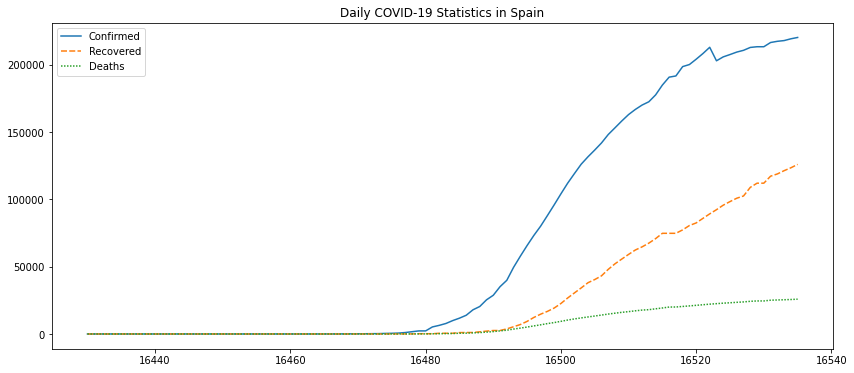

In [45]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Spain")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Spain)

In [46]:
#Obtaining Italy Country Data from the newly created data frame.
select_Italy=country_data[country_data['Country'] == 'Italy']
select_Italy

,Country,Date,Confirmed,Recovered,Deaths
8798,Italy,22/01/2020,0.0,0.0,0.0
8799,Italy,23/01/2020,0.0,0.0,0.0
8800,Italy,24/01/2020,0.0,0.0,0.0
8801,Italy,25/01/2020,0.0,0.0,0.0
8802,Italy,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
8899,Italy,02/05/2020,209328.0,79914.0,28710.0
8900,Italy,03/05/2020,210717.0,81654.0,28884.0
8901,Italy,04/05/2020,211938.0,82879.0,29079.0
8902,Italy,05/05/2020,213013.0,85231.0,29315.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Italy'}>

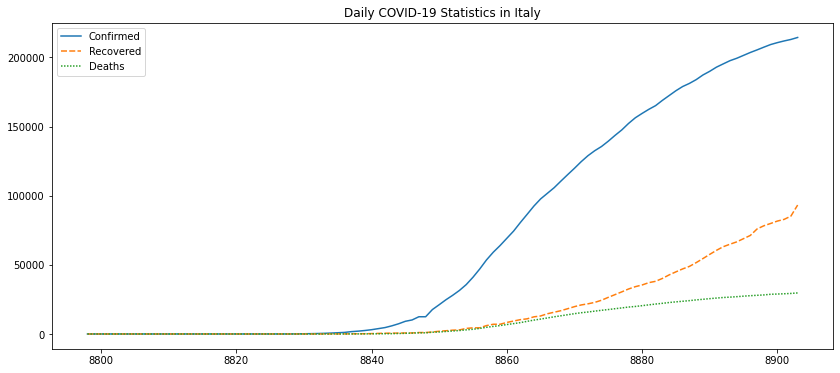

In [47]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Italy")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Italy)

In [48]:
select_UnitedKingdom=country_data[country_data['Country'] == 'United Kingdom']
select_UnitedKingdom

,Country,Date,Confirmed,Recovered,Deaths
18550,United Kingdom,22/01/2020,0.0,0.0,0.0
18551,United Kingdom,23/01/2020,0.0,0.0,0.0
18552,United Kingdom,24/01/2020,0.0,0.0,0.0
18553,United Kingdom,25/01/2020,0.0,0.0,0.0
18554,United Kingdom,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
27661,United Kingdom,02/05/2020,12.0,5.0,1.0
27662,United Kingdom,03/05/2020,12.0,5.0,1.0
27663,United Kingdom,04/05/2020,12.0,6.0,1.0
27664,United Kingdom,05/05/2020,12.0,6.0,1.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in United Kingdom'}>

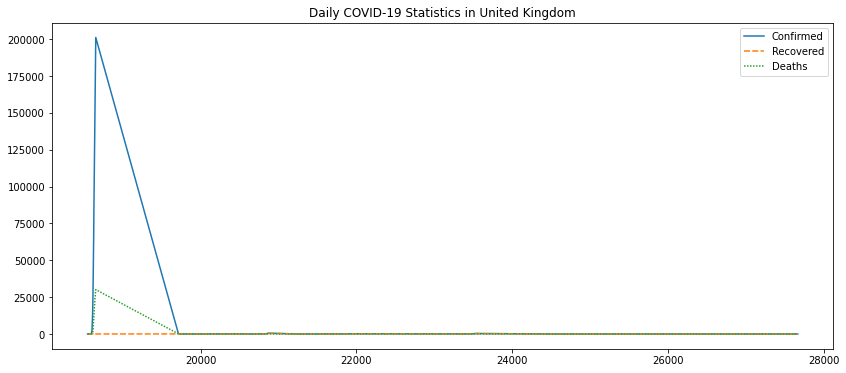

In [49]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in United Kingdom")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_UnitedKingdom)

In [50]:
#Obtaining Germany Country Data from the newly created data frame.
select_Germany=country_data[country_data['Country'] == 'Germany']
select_Germany

,Country,Date,Confirmed,Recovered,Deaths
6784,Germany,22/01/2020,0.0,0.0,0.0
6785,Germany,23/01/2020,0.0,0.0,0.0
6786,Germany,24/01/2020,0.0,0.0,0.0
6787,Germany,25/01/2020,0.0,0.0,0.0
6788,Germany,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
6885,Germany,02/05/2020,164967.0,129000.0,6812.0
6886,Germany,03/05/2020,165664.0,130600.0,6866.0
6887,Germany,04/05/2020,166152.0,132700.0,6993.0
6888,Germany,05/05/2020,167007.0,135100.0,6993.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Germany'}>

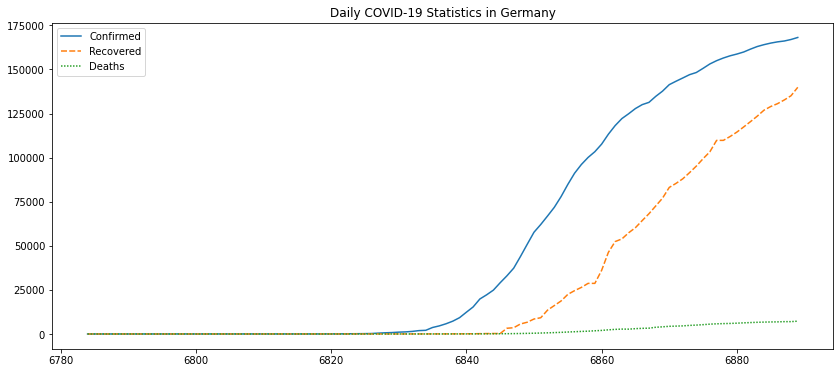

In [51]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Germany")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Germany)

In [52]:
#Obtaining Switzerland Country Data from the newly created data frame.
select_Switzerland=country_data[country_data['Country'] == 'Switzerland']
select_Switzerland

,Country,Date,Confirmed,Recovered,Deaths
16960,Switzerland,22/01/2020,0.0,0.0,0.0
16961,Switzerland,23/01/2020,0.0,0.0,0.0
16962,Switzerland,24/01/2020,0.0,0.0,0.0
16963,Switzerland,25/01/2020,0.0,0.0,0.0
16964,Switzerland,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
17061,Switzerland,02/05/2020,29817.0,24200.0,1762.0
17062,Switzerland,03/05/2020,29905.0,24500.0,1762.0
17063,Switzerland,04/05/2020,29981.0,25200.0,1784.0
17064,Switzerland,05/05/2020,30009.0,25400.0,1795.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Switzerland'}>

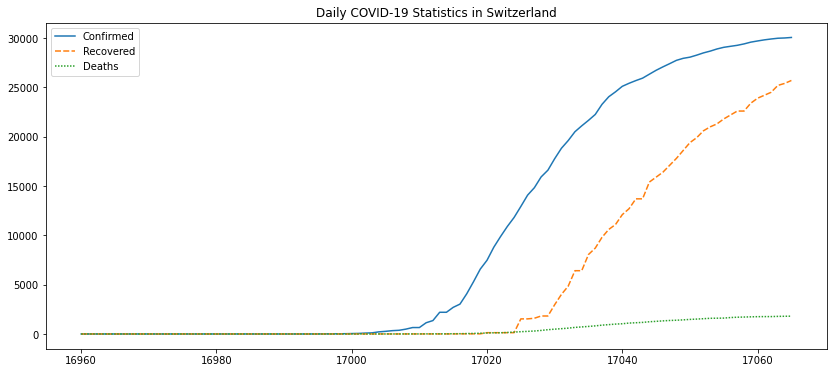

In [53]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Switzerland")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Switzerland)

In [54]:
#Obtaining Brazil Country Data from the newly created data frame.
select_Brazil=country_data[country_data['Country'] == 'Brazil']
select_Brazil

,Country,Date,Confirmed,Recovered,Deaths
2332,Brazil,22/01/2020,0.0,0.0,0.0
2333,Brazil,23/01/2020,0.0,0.0,0.0
2334,Brazil,24/01/2020,0.0,0.0,0.0
2335,Brazil,25/01/2020,0.0,0.0,0.0
2336,Brazil,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
2433,Brazil,02/05/2020,97100.0,40937.0,6761.0
2434,Brazil,03/05/2020,101826.0,42991.0,7051.0
2435,Brazil,04/05/2020,108620.0,45815.0,7367.0
2436,Brazil,05/05/2020,115455.0,48221.0,7938.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Brazil'}>

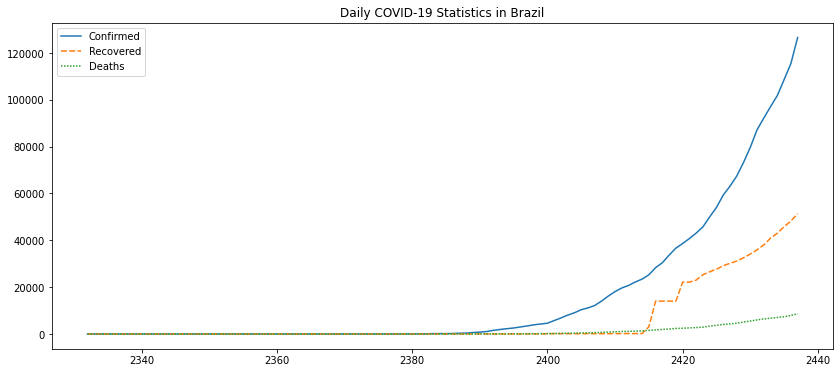

In [55]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Brazil")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Brazil)

In [56]:
#Obtaining Venezuela Country Data from the newly created data frame.
select_Venezuela=country_data[country_data['Country'] == 'Venezuela']
select_Venezuela

,Country,Date,Confirmed,Recovered,Deaths
18868,Venezuela,22/01/2020,0.0,0.0,0.0
18869,Venezuela,23/01/2020,0.0,0.0,0.0
18870,Venezuela,24/01/2020,0.0,0.0,0.0
18871,Venezuela,25/01/2020,0.0,0.0,0.0
18872,Venezuela,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
18969,Venezuela,02/05/2020,345.0,148.0,10.0
18970,Venezuela,03/05/2020,357.0,158.0,10.0
18971,Venezuela,04/05/2020,357.0,158.0,10.0
18972,Venezuela,05/05/2020,361.0,158.0,10.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Venezuela'}>

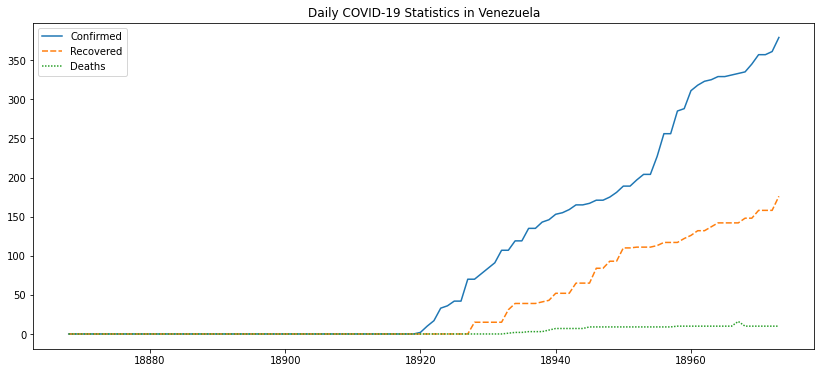

In [57]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Venezuela")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Venezuela)

In [58]:
#Obtaining Canada Country Data from the newly created data frame.
select_Canada=country_data[country_data['Country'] == 'Canada']
select_Canada

,Country,Date,Confirmed,Recovered,Deaths
3286,Canada,22/01/2020,NaN,0.0,NaN
3287,Canada,23/01/2020,NaN,0.0,NaN
3288,Canada,24/01/2020,NaN,0.0,NaN
3289,Canada,25/01/2020,NaN,0.0,NaN
3290,Canada,26/01/2020,NaN,0.0,NaN
...,...,...,...,...,...
28085,Canada,02/05/2020,11.0,NaN,0.0
28086,Canada,03/05/2020,11.0,NaN,0.0
28087,Canada,04/05/2020,11.0,NaN,0.0
28088,Canada,05/05/2020,11.0,NaN,0.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Canada'}>

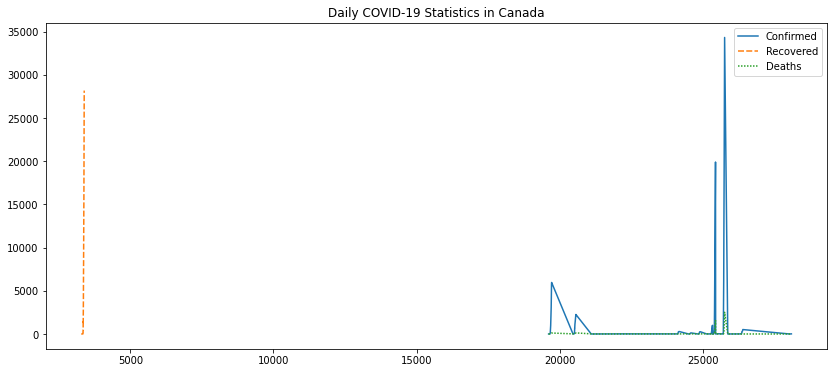

In [59]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Canada")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Canada)

In [60]:
#Obtaining Australia Country Data from the newly created data frame.
select_Australia=country_data[country_data['Country'] == 'Australia']
select_Australia

,Country,Date,Confirmed,Recovered,Deaths
20034,Australia,22/01/2020,0.0,0.0,0.0
20035,Australia,23/01/2020,0.0,0.0,0.0
20036,Australia,24/01/2020,0.0,0.0,0.0
20037,Australia,25/01/2020,0.0,0.0,0.0
20038,Australia,26/01/2020,0.0,0.0,0.0
...,...,...,...,...,...
27873,Australia,02/05/2020,551.0,520.0,8.0
27874,Australia,03/05/2020,551.0,523.0,9.0
27875,Australia,04/05/2020,551.0,528.0,9.0
27876,Australia,05/05/2020,551.0,528.0,9.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Australia'}>

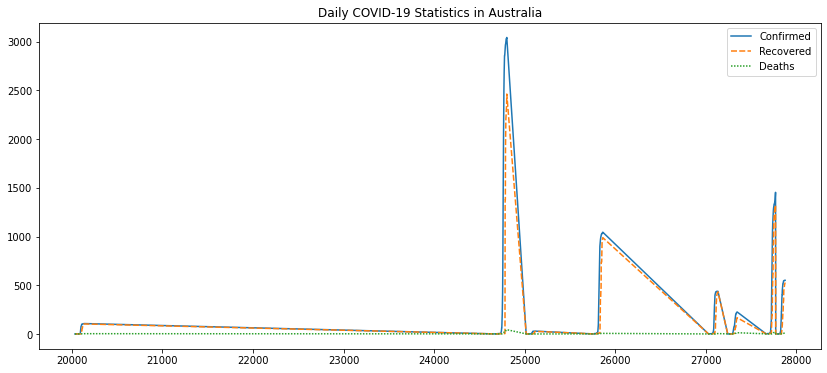

In [61]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Australia")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Australia)

In [62]:
#Obtaining US Country Data from the newly created data frame.
select_US=country_data[country_data['Country'] == 'US']
select_US

,Country,Date,Confirmed,Recovered,Deaths
18126,US,22/01/2020,1.0,0.0,0.0
18127,US,23/01/2020,1.0,0.0,0.0
18128,US,24/01/2020,2.0,0.0,0.0
18129,US,25/01/2020,2.0,0.0,0.0
18130,US,26/01/2020,5.0,0.0,0.0
...,...,...,...,...,...
18227,US,02/05/2020,1132539.0,175382.0,66369.0
18228,US,03/05/2020,1158040.0,180152.0,67682.0
18229,US,04/05/2020,1180375.0,187180.0,68922.0
18230,US,05/05/2020,1204351.0,189791.0,71064.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in US'}>

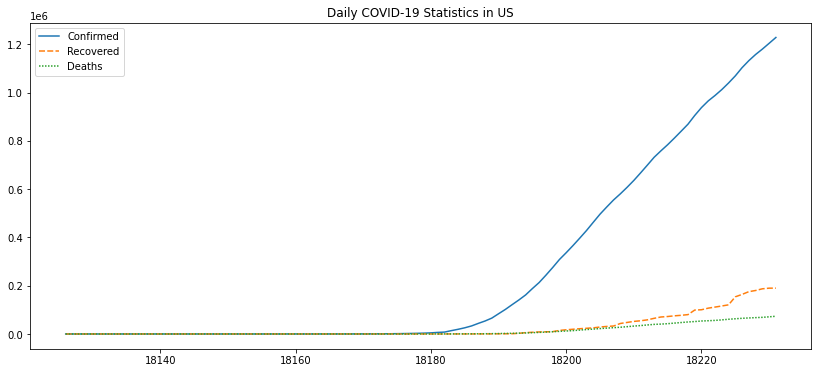

In [63]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in US")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_US)

Observations From The Data And Graphs

All countries studied showed an exponential increase on the number of cases from the index case.
Confirmed cases,deaths attributed to COVID-19 and Apparent lethality rate for the countries was also skewed in the initial stages of the disease as there was limited testing. This is also attributable to the fact that mild disease went undetected (and untested) till later on in the disease progressed or was severe to warrant testing or testing was expanded to a larger proportion of the population.

The exponential rise in the number of cases is also attributed to community spread within various communities in the different countries. As at first, it looked like an "imported" disease then it began to spread in the community.The exponential rise is also attributed to expanded testing policies by different countries.

From the data, it shows that Italy had the highest letahlity rate. However.according to reports by the various countries, the excess mortality rate provided a clear marker for lethality per country.Their argument being they tent to experience slightly morethan the reported deaths attributed to COVID-19.The number of “excess” deaths is derived by comparing the number of deaths in every country in a recent period to the statistical average for that period over the preceding five years.

Certain countries graphs levelled off(showed a plateau) at some point. This was explained by reduced testing or certain countries ceasing to test the populations for the disease. 

The deaths could also be underreported in the different countries where accces to information is limited and the government limiting information dissemination tho the population and other agencies.

Data Table

Pie Chart Visualizations for COVID-19
Although pie charts are not necessarily the most informative visualizations, I added them to increase some variety for the visualizations.

Bar Chart Visualizations for COVID-19
This offers us some insights for how different countries/regions compare in terms of covid cases.